In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
df = pd.read_csv('IPG2211A2N.csv', index_col="DATE", parse_dates=True)
df.index.freq = 'MS'
df = df[(df.index >= '1970') & (df.index < '1990')]

In [73]:
df.dropna(inplace=True)

In [74]:
df.head()

,IPG2211A2N
DATE,
1970-01-01,43.0869
1970-02-01,42.5578
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


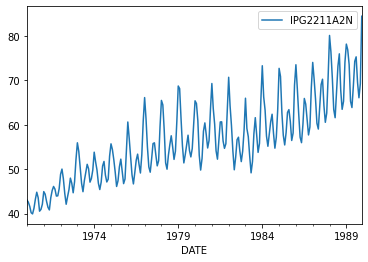

In [75]:
df.plot()

In [76]:
df['12_month_SMA'] = df['IPG2211A2N'].rolling(window=12).mean()

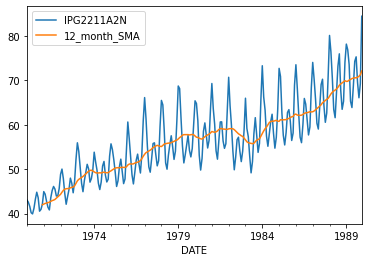

In [77]:
df.plot()

In [78]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [79]:
df['EWMA'] = SimpleExpSmoothing(df['IPG2211A2N']).fit().fittedvalues.shift(-1)

e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


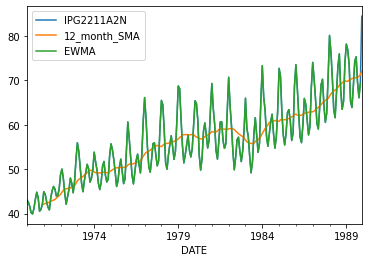

In [80]:
df.plot()

In [81]:
df['DSE_mult'] = ExponentialSmoothing(df['IPG2211A2N'], trend='mul').fit().fittedvalues.shift(-1)

e:\documents\university\timeseries\venv\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


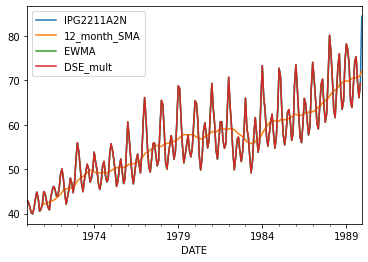

In [82]:
df.plot()

In [89]:
df['DSE_mult'].isnull().values.any()

True